In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")       
import pandas_profiling as pp 

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# 1.Load and Check Data

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]

In [3]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Variable Description

* PassengerId: unique id number to each passenger
* Survived: passenger survive(1) or died(0)
* Pclass: passenger class
* Name: name
* Sex: gender of passenger
* Age: age of passenger
* SibSp: number of siblings/spouses
* Parch: number of parents/children
* Ticket: ticket number
* Fare: amount of money spent on ticket
* Cabin: cabin category
* Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:

profile_report = pp.ProfileReport(train_df)

In [8]:
profile_report

 As you can see above(Pandas Profile);
   *  histogram distributions of variables
   *  value_count() all variables 

# 2.Missing Value

* train_df Missing Value
* test_df Missing Value

## 2.1.Train Missing Value

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Cabin 

train_df.drop("Cabin", axis = 1, inplace = True)


* Since 692 of 891 data is missing, I droped cabin column.

In [11]:
#Embarked

train_df[train_df["Embarked"].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN

* Missing Embarked value is 1 st Pclass and Fare is 80.So, I looked Fare-Embarked relationships and I filled "C".

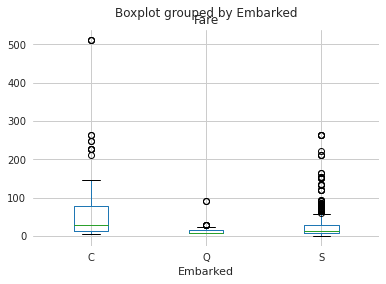

In [12]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()


In [13]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")


* The Age feature has 177 null values. We know that max, min, mean, median value of Age. But this data is not enough for filling null values.

* I checked the Name feature and I noticed that all names have a personal titles (Mr, miss etc.). So, I used mean value of personal titles in order to filled missing Age value.

In [14]:
#Age

name = train_df["Name"]
train_df["Name_Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [15]:
train_df["Name_Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
the Countess      1
Capt              1
Lady              1
Sir               1
Mme               1
Ms                1
Don               1
Jonkheer          1
Name: Name_Title, dtype: int64

In [16]:
train_df['Name_Title'].replace( ['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer',
'Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other',
'Other','Mr','Mr','Mr'],inplace=True)

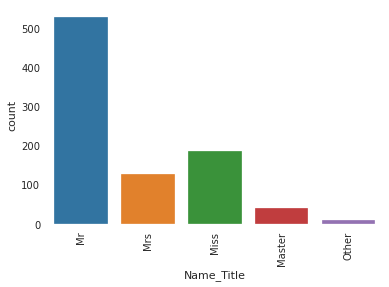

In [17]:
sns.countplot(x="Name_Title", data = train_df);
plt.xticks(rotation = 90);


In [18]:
train_df.groupby('Name_Title')['Age'].mean()

Name_Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
train_df.loc[(train_df["Age"].isnull())&(train_df["Name_Title"]=='Mr'),'Age']=33
train_df.loc[(train_df["Age"].isnull())&(train_df["Name_Title"]=='Mrs'),'Age']=36
train_df.loc[(train_df["Age"].isnull())&(train_df["Name_Title"]=='Master'),'Age']=5
train_df.loc[(train_df["Age"].isnull())&(train_df["Name_Title"]=='Miss'),'Age']=22
train_df.loc[(train_df["Age"].isnull())&(train_df["Name_Title"]=='Other'),'Age']=46

In [20]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Name_Title     0
dtype: int64

* I applied the same changes to the test data in order to filled missing value.

## 2.2.Test Missing Value

In [21]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
#Cabin

test_df.drop("Cabin", axis = 1, inplace = True)

In [23]:
#Fare

test_df[test_df["Fare"].isnull()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Embarked  
152   NaN        S

In [24]:
test_df[["Embarked","Fare"]].groupby(["Embarked"],as_index = False).mean() 

Embarked       Fare
0        C  66.259765
1        Q  10.957700
2        S  28.230436

In [25]:
test_df["Fare"].fillna(66, inplace = True)

In [26]:
#Age

name = test_df["Name"]
test_df["Name_Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [27]:
test_df['Name_Title'].replace( ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer',
'Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other',
'Other','Mr','Mr','Mr','Other'],inplace=True)

In [28]:
test_df.groupby('Name_Title')['Age'].mean()

Name_Title
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.903226
Other     42.000000
Name: Age, dtype: float64

In [29]:
test_df.loc[(test_df["Age"].isnull())&(test_df["Name_Title"]=='Mr'),'Age']=32
test_df.loc[(test_df["Age"].isnull())&(test_df["Name_Title"]=='Mrs'),'Age']=38
test_df.loc[(test_df["Age"].isnull())&(test_df["Name_Title"]=='Master'),'Age']=7
test_df.loc[(test_df["Age"].isnull())&(test_df["Name_Title"]=='Miss'),'Age']=21
test_df.loc[(test_df["Age"].isnull())&(test_df["Name_Title"]=='Other'),'Age']=42

In [30]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Name_Title     0
dtype: int64

# 3.Visualization
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived
* Age - Survived
* Pclass - Survived - Age
* Embarked - Sex - Pclass - Survived
* Embarked - Sex - Fare - Survived

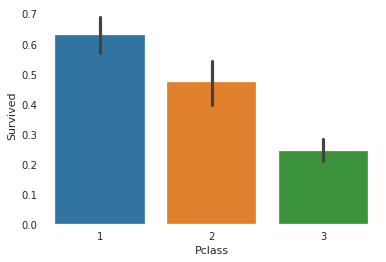

In [31]:
#Pclass - Survived
sns.barplot(train_df["Pclass"], train_df["Survived"]);

In [32]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],
as_index = False).mean().sort_values(by="Survived",ascending = False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

* As you can see above rich people are always much more lucky.

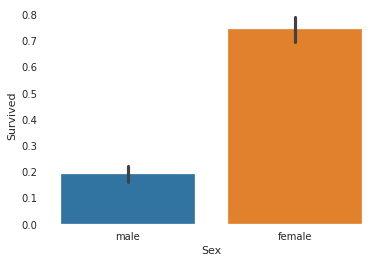

In [33]:
#Sex - Survived
sns.barplot(train_df["Sex"], train_df["Survived"]);

In [34]:
train_df[["Sex","Survived"]].groupby(["Sex"],
as_index = False).mean().sort_values(by="Survived",ascending = False)

Sex  Survived
0  female  0.742038
1    male  0.188908

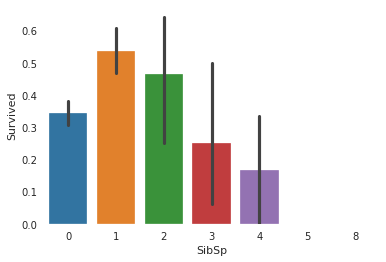

In [35]:
#SibSp - Survived
sns.barplot(train_df["SibSp"], train_df["Survived"]);


* if sibsp == 0 or 1 or 2, passenger has more chance to survive.

In [36]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],
as_index = False).mean().sort_values(by="Survived",ascending = False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

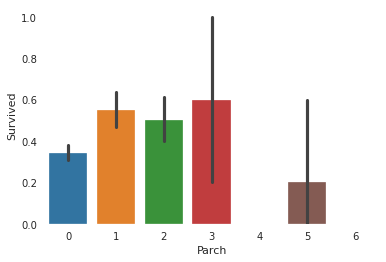

In [37]:
#Parch - Survived
sns.barplot(train_df["Parch"], train_df["Survived"]);


* small familes have more chance to survive.

In [38]:
train_df[["Parch","Survived"]].groupby(["Parch"],
as_index = False).mean().sort_values(by="Survived",ascending = False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

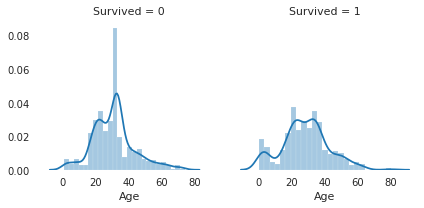

In [39]:
#Age - Survived

g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* age <= 10 and oldest pasengers have a high survival rate. 
* Range of 20-25 years old did not survive.

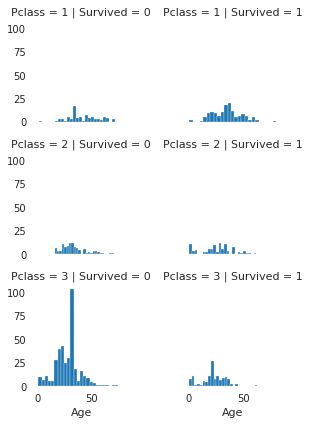

In [40]:
#Pclass - Survived - Age

g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 2)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

* As you can see above, Pclass is important feature for Survived.

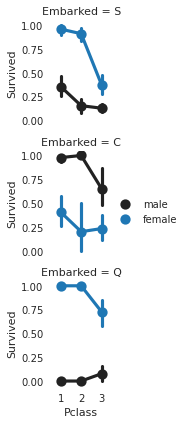

In [41]:
#Embarked - Sex - Pclass - Survived

g = sns.FacetGrid(train_df, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

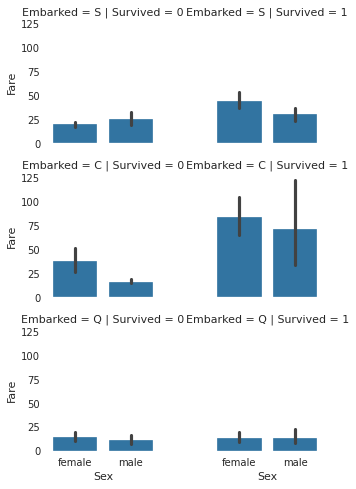

In [42]:
#Embarked - Sex - Fare - Survived

g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

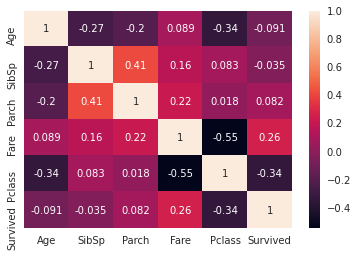

In [43]:
#HeatMap
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Fare","Pclass","Survived"]].corr(), annot = True)
plt.show()

* Fare is the most important feature for survived.

# 4.Feature Engineering

* Age Feature
* Sex - Embarked - Name_Title Feature
* Family Size / IsAlone - (New Feature includes SibSp and Parch) 
* Fare Feature 


In [44]:
train_df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked Name_Title  
0      0  A/5 21171   7.2500        S         Mr  
1      0   PC 17599  71.2833        C        Mrs

In [45]:
test_df.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Embarked Name_Title  
0      0  330911  7.8292        Q         Mr  
1      0  363272  7.0000        S        Mrs

In [46]:
train_test = [train_df, test_df]

## 4.1.Age Feature

In [47]:
train_df['Age_Band'] = pd.cut(train_df['Age'], 5)
train_df[['Age_Band', 'Survived']].groupby(['Age_Band'], 
        as_index=False).mean().sort_values(by='Age_Band', ascending=True)

Age_Band  Survived
0    (0.34, 16.336]  0.548077
1  (16.336, 32.252]  0.392670
2  (32.252, 48.168]  0.320000
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909

In [48]:
for dataset in train_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  1.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  2.0      1   
2                             Heikkinen, Miss. Laina  female  1.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  2.0      1   
4                           Allen, Mr. William Henry    male  2.0      0   

   Parch            Ticket     Fare Embarked Name_Title          Age_Band  
0      0         A/5 21171   7.2500        S         Mr  (16.336, 32.252]  
1      0          PC 17599  71.2833        C        Mrs  (32.252, 48.168]  
2      0  STON/O2. 3101282   7.9250        S       Miss  (16.336, 32.252]  
3      0            113803  53.1000        S        Mrs  (32.252, 48.168]  
4      0            373450   8.0500        S         Mr  (32.252, 48.168]

## 4.2.Sex - Embarked - Name_Title Feature

In [49]:
for dataset in train_test:
    dataset['Sex'].replace(['male','female'],[0,1],inplace=True)
    dataset['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
    dataset['Name_Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  1.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  2.0      1      0   
2                             Heikkinen, Miss. Laina    1  1.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  2.0      1      0   
4                           Allen, Mr. William Henry    0  2.0      0      0   

             Ticket     Fare  Embarked  Name_Title          Age_Band  
0         A/5 21171   7.2500         0           0  (16.336, 32.252]  
1          PC 17599  71.2833         1           1  (32.252, 48.168]  
2  STON/O2. 3101282   7.9250         0           2  (16.336, 32.252]  
3            113803  53.1000         0           1  (32.252, 48.168]  
4            373450   8.0500         0           0  (32.252, 48.168]

In [50]:

for dataset in train_test:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [51]:
for dataset in train_test:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


## 4.3.Fare Feature

In [52]:
train_df['Fare_Band'] = pd.qcut(train_df['Fare'], 4)
print (train_df[['Fare_Band', 'Survived']].groupby(['Fare_Band'], as_index=False).mean())
train_df.head()

         Fare_Band  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  1.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  2.0      1      0   
2                             Heikkinen, Miss. Laina    1  1.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  2.0      1      0   
4                           Allen, Mr. William Henry    0  2.0      0      0   

             Ticket     Fare  Embarked  Name_Title          Age_Band  \
0         A/5 21171   7.2500         0           0  (16.336, 32.252]   
1          PC 17599  71.2833         1           1  (32.252, 48.168]   
2  STON/O2. 3101282   7.9250         0           2  (16.336, 32.252]   
3            113803  53.1000         0           1  (32.252, 48.168]   
4            373450   8.0500         0           0  (32.252, 48.168]   

   FamilySize  IsAlone        Fare_Band  
0           2        0   (-0.001, 7.91]  
1           2        0  (31.0, 512.329]  
2           1        1   (7.91, 14.454]  
3           2        0  (31.0, 512.329]  
4           1        1   (7.91, 14.454]

In [53]:
for dataset in train_test:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  1.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  2.0      1      0   

      Ticket  Fare  Embarked  Name_Title          Age_Band  FamilySize  \
0  A/5 21171     0         0           0  (16.336, 32.252]           2   
1   PC 17599     3         1           1  (32.252, 48.168]           2   

   IsAlone        Fare_Band  
0        0   (-0.001, 7.91]  
1        0  (31.0, 512.329]

In [54]:
test_df.head(2)

PassengerId  Pclass                              Name  Sex  Age  SibSp  \
0          892       3                  Kelly, Mr. James    0  2.0      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)    1  2.0      1   

   Parch  Ticket  Fare  Embarked  Name_Title  FamilySize  IsAlone  
0      0  330911     0         2           0           1        1  
1      0  363272     0         0           1           2        0

In [55]:
train_df.drop(["Name", "SibSp", "Parch", "Ticket", "PassengerId", "Age_Band", "Fare_Band"], axis = 1, inplace = True)
test_df.drop(["Name","SibSp", "Parch","Ticket","PassengerId"], axis = 1, inplace = True)

In [56]:
train_df.head(2)

Survived  Pclass  Sex  Age  Fare  Embarked  Name_Title  FamilySize  IsAlone
0         0       3    0  1.0     0         0           0           2        0
1         1       1    1  2.0     3         1           1           2        0

In [57]:
test_df.head(2)

Pclass  Sex  Age  Fare  Embarked  Name_Title  FamilySize  IsAlone
0       3    0  2.0     0         2           0           1        1
1       3    1  2.0     0         0           1           2        0

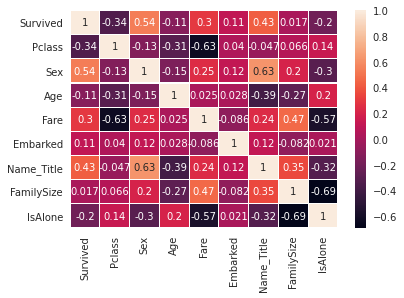

In [59]:
sns.heatmap(train_df.corr(),annot=True,linewidths=0.2)

plt.show()

* After feature engineering, there is an increase in correlation.

## 4.4.One-Hot Encoding

After preparing the data for modeling, I wondered how the results would change if I applied one-hot encoding. So I decided to try both. My first data is without one-hot encoding other is one-hot encoding. I applied one-hot encoding to the data I edited with feature engineering. We will see the effect of this change on the results.

In [65]:
train_df1 = train_df.copy()
test_df1 = test_df.copy()



In [79]:
train_test1 = [train_df1,test_df1]

In [68]:
for dataset in train_test1:
    dataset["Pclass"] = dataset["Pclass"].astype("category")
    dataset["Sex"] = dataset["Sex"].astype("category")
    dataset["Fare"] = dataset["Fare"].astype("category")
    dataset["Embarked"] = dataset["Embarked"].astype("category")
    dataset["Name_Title"] = dataset["Name_Title"].astype("category")
    dataset["Age"] = dataset["Age"].astype("category")
    dataset["IsAlone"] = dataset["IsAlone"].astype("category")
    dataset["FamilySize"] = dataset["FamilySize"].astype("category")

In [82]:
#train_df1=pd.get_dummies(train_df1,drop_first=True)

train_df1 = pd.get_dummies(train_df1, columns=["Sex"])
train_df1 = pd.get_dummies(train_df1, columns=["Pclass"])
train_df1 = pd.get_dummies(train_df1, columns=["Fare"])
train_df1 = pd.get_dummies(train_df1, columns=["Name_Title"])
train_df1 = pd.get_dummies(train_df1, columns=["Age"])
train_df1 = pd.get_dummies(train_df1, columns=["FamilySize"])
train_df1 = pd.get_dummies(train_df1, columns=["IsAlone"])
train_df1 = pd.get_dummies(train_df1, columns=["Embarked"])

In [84]:
#test_df1=pd.get_dummies(test_df1,drop_first=True)

test_df1 = pd.get_dummies(test_df1, columns=["Sex"])
test_df1 = pd.get_dummies(test_df1, columns=["Pclass"])
test_df1 = pd.get_dummies(test_df1, columns=["Fare"])
test_df1 = pd.get_dummies(test_df1, columns=["Name_Title"])
test_df1 = pd.get_dummies(test_df1, columns=["Age"])
test_df1 = pd.get_dummies(test_df1, columns=["FamilySize"])
test_df1 = pd.get_dummies(test_df1, columns=["IsAlone"])
test_df1 = pd.get_dummies(test_df1, columns=["Embarked"])

In [83]:
train_df1.head()

Survived  Embarked_0  Embarked_1  Embarked_2  Sex_0  Sex_1  Pclass_1  \
0         0           1           0           0      1      0         0   
1         1           0           1           0      0      1         1   
2         1           1           0           0      0      1         0   
3         1           1           0           0      0      1         1   
4         0           1           0           0      1      0         0   

   Pclass_2  Pclass_3  Fare_0  ...  FamilySize_2  FamilySize_3  FamilySize_4  \
0         0         1       1  ...             1             0             0   
1         0         0       0  ...             1             0             0   
2         0         1       0  ...             0             0             0   
3         0         0       0  ...             1             0             0   
4         0         1       0  ...             0             0             0   

   FamilySize_5  FamilySize_6  FamilySize_7  FamilySize_8  FamilySize_11  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             0             0             0             0              0   
3             0             0             0             0              0   
4             0             0             0             0              0   

   IsAlone_0  IsAlone_1  
0          1          0  
1          1          0  
2          0          1  
3          1          0  
4          0          1  

[5 rows x 34 columns]

In [85]:
test_df1.head()

Sex_0  Sex_1  Pclass_1  Pclass_2  Pclass_3  Fare_0  Fare_1  Fare_2  Fare_3  \
0      1      0         0         0         1       1       0       0       0   
1      0      1         0         0         1       1       0       0       0   
2      1      0         0         1         0       0       1       0       0   
3      1      0         0         0         1       0       1       0       0   
4      0      1         0         0         1       0       1       0       0   

   Name_Title_0  ...  FamilySize_5  FamilySize_6  FamilySize_7  FamilySize_8  \
0             1  ...             0             0             0             0   
1             0  ...             0             0             0             0   
2             1  ...             0             0             0             0   
3             1  ...             0             0             0             0   
4             0  ...             0             0             0             0   

   FamilySize_11  IsAlone_0  IsAlone_1  Embarked_0  Embarked_1  Embarked_2  
0              0          0          1           0           0           1  
1              0          1          0           1           0           0  
2              0          0          1           0           0           1  
3              0          0          1           1           0           0  
4              0          1          0           1           0           0  

[5 rows x 33 columns]

# 5.Modelling

In [86]:
X_train = train_df.drop(["Survived"], axis = 1)
y_train = train_df["Survived"]
X_test = test_df

X_train1 = train_df1.drop(["Survived"], axis = 1)
y_train1 = train_df1["Survived"]
X_test1 = test_df1

In [87]:
X_train.head()

Pclass  Sex  Age  Fare  Embarked  Name_Title  FamilySize  IsAlone
0       3    0  1.0     0         0           0           2        0
1       1    1  2.0     3         1           1           2        0
2       3    1  1.0     1         0           2           1        1
3       1    1  2.0     3         0           1           2        0
4       3    0  2.0     1         0           0           1        1

In [88]:
X_train1.head()

Embarked_0  Embarked_1  Embarked_2  Sex_0  Sex_1  Pclass_1  Pclass_2  \
0           1           0           0      1      0         0         0   
1           0           1           0      0      1         1         0   
2           1           0           0      0      1         0         0   
3           1           0           0      0      1         1         0   
4           1           0           0      1      0         0         0   

   Pclass_3  Fare_0  Fare_1  ...  FamilySize_2  FamilySize_3  FamilySize_4  \
0         1       1       0  ...             1             0             0   
1         0       0       0  ...             1             0             0   
2         1       0       1  ...             0             0             0   
3         0       0       0  ...             1             0             0   
4         1       0       1  ...             0             0             0   

   FamilySize_5  FamilySize_6  FamilySize_7  FamilySize_8  FamilySize_11  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             0             0             0             0              0   
3             0             0             0             0              0   
4             0             0             0             0              0   

   IsAlone_0  IsAlone_1  
0          1          0  
1          1          0  
2          0          1  
3          1          0  
4          0          1  

[5 rows x 33 columns]

## 5.1.Modelling without One-Hot Encoding

## 5.1.1.Logistic Regression

In [89]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [90]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = "liblinear")
log_model = log.fit(X_train,y_train)
log_model

LogisticRegression(solver='liblinear')

In [92]:
confusion_matrix(y_train, log_model.predict(X_train))
print(classification_report(y_train, log_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



In [94]:
accuracy_score(y_train, log_model.predict(X_train))
cross_val_score(log_model, X_train, y_train, cv = 10).mean()

0.8024968789013732

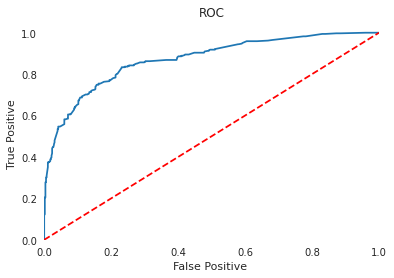

In [98]:
logit_roc_auc = roc_auc_score(y_train, log_model.predict(X_train))

fpr, tpr, thresholds = roc_curve(y_train, log_model.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC')
plt.show()

## 5.1.2.Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [100]:
accuracy_score(y_train, nb_model.predict(X_train))

0.8047138047138047

In [101]:
cross_val_score(nb_model, X_train, nb_model.predict(X_train), cv = 10).mean()

0.922621722846442

## 5.1.3.KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [105]:

accuracy_score(y_train, knn_model.predict(X_train))

0.8451178451178452

In [106]:
knn_params = {"n_neighbors": np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [107]:
print("Best KNN score:" + str(knn_cv.best_score_))
print("Best KNN parameter: " + str(knn_cv.best_params_))

Best KNN score:0.818214731585518
Best KNN parameter: {'n_neighbors': 10}


In [108]:
knn = KNeighborsClassifier(10)
knn_tuned = knn.fit(X_train, y_train)

In [109]:

accuracy_score(y_train, knn_tuned.predict(X_train))

0.8439955106621774

In [110]:
d = {'Accuracy in KNN before GridSearchCV ': [0.84], 'Accuracy in KNN After GridSearchCV': [0.84]}
knn_data = pd.DataFrame(data=d)
knn_data

Accuracy in KNN before GridSearchCV   Accuracy in KNN After GridSearchCV
0                                  0.84                                0.84

## 5.1.4.SVC

In [115]:
from sklearn.svm import SVC


svm_model = SVC(kernel = "rbf").fit(X_train, y_train)

accuracy_score(y_train, svm_model.predict(X_train))

0.8316498316498316

In [116]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    9.8s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [117]:
print("Best Params: " + str(svc_cv_model.best_params_))

Best Params: {'C': 10, 'gamma': 0.1}


In [118]:
svc_tuned = SVC(C = 10, gamma = 0.1).fit(X_train, y_train)

accuracy_score(y_train, svc_tuned.predict(X_train))

0.8507295173961841

In [119]:
d = {'Accuracy in SVM before GridSearchCV ': [0.83], 'Accuracy in SVM After GridSearchCV': [0.85]}
svm_data = pd.DataFrame(data=d)
svm_data

Accuracy in SVM before GridSearchCV   Accuracy in SVM After GridSearchCV
0                                  0.83                                0.85

## 5.1.5.Random Forests

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)

accuracy_score(y_train, rf_model.predict(X_train))

0.8855218855218855

In [122]:
rf_params = {"max_depth": [2,5,8],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  6.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [123]:
print("Best Params: " + str(rf_cv_model.best_params_))

Best Params: {'max_depth': 5, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 1000}


In [124]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)

In [125]:
rf_tuned.fit(X_train, y_train)

accuracy_score(y_train, rf_tuned.predict(X_train))

0.8361391694725028

In [127]:
confusion_matrix(y_train, rf_tuned.predict(X_train))
print(classification_report(y_train, rf_tuned.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       549
           1       0.82      0.74      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.84      0.84      0.83       891



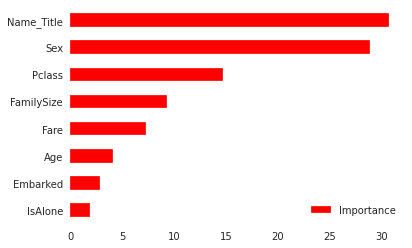

In [128]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r");

In [129]:
d = {'Accuracy in RF before GridSearchCV ': [0.88], 'Accuracy in RF After GridSearchCV': [0.83]}
rf_data = pd.DataFrame(data=d)
rf_data

Accuracy in RF before GridSearchCV   Accuracy in RF After GridSearchCV
0                                 0.88                               0.83

## 5.1.6.GBM

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

accuracy_score(y_train, gbm_model.predict(X_train))

0.8473625140291807

In [132]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.4min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [133]:
print("Best Params: " + str(gbm_cv.best_params_))

Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 500}


In [134]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 10,
                                n_estimators = 500)

gbm_tuned =  gbm.fit(X_train,y_train)

In [135]:

accuracy_score(y_train, gbm_tuned.predict(X_train))

0.8451178451178452

In [137]:
confusion_matrix(y_train, gbm_tuned.predict(X_train))
print(classification_report(y_train, gbm_tuned.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       549
           1       0.87      0.70      0.78       342

    accuracy                           0.85       891
   macro avg       0.85      0.82      0.83       891
weighted avg       0.85      0.85      0.84       891



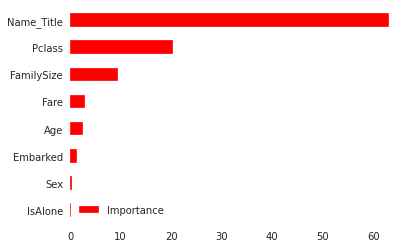

In [138]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r");

* As you can see above importance of Sex is decrase. 

In [139]:
d = {'Accuracy in GBM before GridSearchCV ': [0.8473], 'Accuracy in GBM After GridSearchCV': [0.8451]}
gbm_data = pd.DataFrame(data=d)
gbm_data

Accuracy in GBM before GridSearchCV   Accuracy in GBM After GridSearchCV
0                                0.8473                              0.8451

In [141]:
models = [
    knn_tuned,
    log_model,
    svc_tuned,
    nb_model,
    rf_tuned,
    gbm_tuned,
    
]


for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    print("-"*28)
    print(name + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 84.3996%
----------------------------
LogisticRegression:
Accuracy: 80.6958%
----------------------------
SVC:
Accuracy: 85.0730%
----------------------------
GaussianNB:
Accuracy: 80.4714%
----------------------------
RandomForestClassifier:
Accuracy: 83.6139%
----------------------------
GradientBoostingClassifier:
Accuracy: 84.5118%


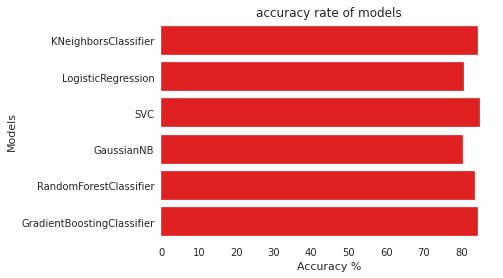

In [142]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)    
    result = pd.DataFrame([[name, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('accuracy rate of models'); 

* Best accuracy is SVM(kernel = rbf).

## 5.2.Modelling with One-Hot Encoding 

## 5.2.1. Logistic Regression (One-Hot Encoding)

In [144]:
log = LogisticRegression(solver = "liblinear")
log_model_onehot = log.fit(X_train1,y_train1)
log_model_onehot

LogisticRegression(solver='liblinear')

In [146]:

print(classification_report(y_train1, log_model_onehot.predict(X_train1)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       549
           1       0.79      0.75      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



In [147]:
accuracy_score(y_train, log_model_onehot.predict(X_train1))
cross_val_score(log_model, X_train1, y_train1, cv = 10).mean()

0.8282896379525593

## 5.2.2.Naive Bayes(One-Hot Encoding)

In [173]:
nb = GaussianNB()
nb_model_onehot = nb.fit(X_train1, y_train1)
nb_model_onehot

GaussianNB()

In [174]:
accuracy_score(y_train1, nb_model_onehot.predict(X_train1))

0.4478114478114478

In [175]:
cross_val_score(nb_model_onehot, X_train1, nb_model_onehot.predict(X_train1), cv = 10).mean()

0.995505617977528

## 5.2.3.KNN (One-Hot Encoding)

In [176]:
knn = KNeighborsClassifier()
knn_model_onehot = knn.fit(X_train1, y_train1)
knn_model_onehot

KNeighborsClassifier()

In [177]:
accuracy_score(y_train1, knn_model_onehot.predict(X_train1))

0.8159371492704826

In [178]:
knn_params = {"n_neighbors": np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv_onehot = GridSearchCV(knn, knn_params, cv=10)
knn_cv_onehot.fit(X_train1, y_train1)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [179]:
print("Best KNN parameter: " + str(knn_cv_onehot.best_params_))

Best KNN parameter: {'n_neighbors': 4}


In [180]:
knn = KNeighborsClassifier(10)
knn_tuned_onehot = knn.fit(X_train1, y_train1)
accuracy_score(y_train1, knn_tuned_onehot.predict(X_train1))

0.8237934904601572

In [181]:
d = {'Accuracy in KNN before GridSearchCV ': [0.81], 'Accuracy in KNN After GridSearchCV': [0.82]}
knn_data = pd.DataFrame(data=d)
knn_data

Accuracy in KNN before GridSearchCV   Accuracy in KNN After GridSearchCV
0                                  0.81                                0.82

## 5.2.4.SVC

In [149]:
from sklearn.svm import SVC


svm_model_onehot = SVC(kernel = "rbf").fit(X_train1, y_train1)

accuracy_score(y_train1, svm_model_onehot.predict(X_train1))

0.8439955106621774

In [153]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

svc = SVC()
svc_cv_model_onehot = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model_onehot.fit(X_train1, y_train1)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   10.3s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [154]:
print("Best Params: " + str(svc_cv_model_onehot.best_params_))

Best Params: {'C': 1, 'gamma': 0.1}


In [156]:
svc_tuned_onehot = SVC(C = 1, gamma = 0.1).fit(X_train1, y_train1)

accuracy_score(y_train1, svc_tuned_onehot.predict(X_train1))

0.8395061728395061

In [157]:
d = {'Accuracy in SVM before GridSearchCV ': [0.84], 'Accuracy in SVM After GridSearchCV': [0.83]}
svm_data = pd.DataFrame(data=d)
svm_data

Accuracy in SVM before GridSearchCV   Accuracy in SVM After GridSearchCV
0                                  0.84                                0.83

## 5.1.5.Random Forests(One Hot Encoding)

In [159]:
rf_model_onehot = RandomForestClassifier().fit(X_train1, y_train1)

accuracy_score(y_train1, rf_model_onehot.predict(X_train1))

0.8855218855218855

In [160]:
rf_params = {"max_depth": [2,5,8],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv_model_onehot = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_cv_model_onehot.fit(X_train1, y_train1)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  6.4min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [161]:
print("Best Params: " + str(rf_cv_model_onehot.best_params_))

Best Params: {'max_depth': 5, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 500}


In [162]:
rf_tuned_onehot = RandomForestClassifier(max_depth = 5, 
                                  max_features = 5, 
                                  min_samples_split = 10,
                                  n_estimators = 500)

In [163]:
rf_tuned_onehot.fit(X_train1, y_train1)

accuracy_score(y_train1, rf_tuned_onehot.predict(X_train1))

0.8361391694725028

In [164]:
confusion_matrix(y_train1, rf_tuned_onehot.predict(X_train1))
print(classification_report(y_train1, rf_tuned_onehot.predict(X_train1)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.82      0.73      0.77       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.84      0.84      0.83       891



In [166]:
d = {'Accuracy in RF before GridSearchCV ': [0.88], 'Accuracy in RF After GridSearchCV': [0.83]}
rf_data = pd.DataFrame(data=d)
rf_data

Accuracy in RF before GridSearchCV   Accuracy in RF After GridSearchCV
0                                 0.88                               0.83

## 5.2.6.GBM(One Hot Encoding)

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model_onehot = GradientBoostingClassifier().fit(X_train1, y_train1)

accuracy_score(y_train, gbm_model_onehot.predict(X_train1))

0.8451178451178452

In [168]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

gbm = GradientBoostingClassifier()

gbm_cv_onehot = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_onehot.fit(X_train1, y_train1)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  6.0min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [169]:
print("Best Params: " + str(gbm_cv_onehot.best_params_))

Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [170]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 2,
                                n_estimators = 100)

gbm_tuned_onehot =  gbm.fit(X_train1,y_train1)

In [171]:
accuracy_score(y_train1, gbm_tuned_onehot.predict(X_train1))

0.8294051627384961

In [172]:
d = {'Accuracy in GBM before GridSearchCV ': [0.84], 'Accuracy in GBM After GridSearchCV': [0.82]}
gbm_data = pd.DataFrame(data=d)
gbm_data

Accuracy in GBM before GridSearchCV   Accuracy in GBM After GridSearchCV
0                                  0.84                                0.82

In [182]:
models = [
    
    knn_tuned_onehot,
    log_model_onehot,
    svc_tuned_onehot,
    nb_model_onehot,
    rf_tuned_onehot,
    gbm_tuned_onehot,
    
]


for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_train1)
    accuracy = accuracy_score(y_train1, y_pred)
    print("-"*28)
    print(name + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 82.3793%
----------------------------
LogisticRegression:
Accuracy: 82.9405%
----------------------------
SVC:
Accuracy: 83.9506%
----------------------------
GaussianNB:
Accuracy: 44.7811%
----------------------------
RandomForestClassifier:
Accuracy: 83.6139%
----------------------------
GradientBoostingClassifier:
Accuracy: 82.9405%


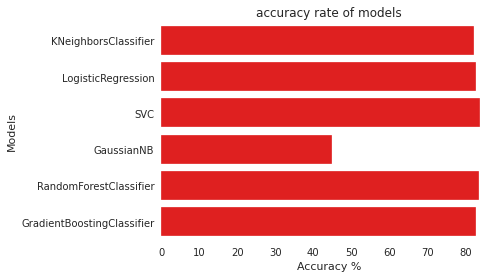

In [183]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_train1)
    accuracy = accuracy_score(y_train1, y_pred)    
    result = pd.DataFrame([[name, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('accuracy rate of models'); 

* Best accuracy is SVC(kernel = rbf). 

In [191]:
df = [("KNN",84),
      ("KNN(onehot)",82),
      ("Logreg", 80),
      ("logreg(onehot)",82),
      ("SVC", 85),
      ("SVC(onehot)",83),
      ("NB", 80),
      ("NB(onehot)",44),
      ("RF",83),
      ("RF(onehot)",83),
      ("GBM", 85),
      ("GBM(onehot)",82)]
model = pd.DataFrame(df, columns=['Model' , 'Accuracy %'])
model

Model  Accuracy %
0              KNN          84
1      KNN(onehot)          82
2           Logreg          80
3   logreg(onehot)          82
4              SVC          85
5      SVC(onehot)          83
6               NB          80
7       NB(onehot)          44
8               RF          83
9       RF(onehot)          83
10             GBM          85
11     GBM(onehot)          82

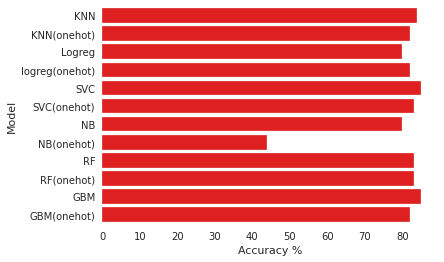

In [194]:
sns.barplot(x= 'Accuracy %', y = 'Model', data=model, color="r");

* After modelling, You can see that one hot encoding does not have much effect on the results.

* Best accuracy is that the database without using one hot encoding(train_df) with SVC model.

In [ ]:
test_survived = pd.Series(svc_tuned.predict(X_test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)